In [2]:
library(catboost)
library(caret)
library(dplyr)
library(tidyverse)
library(MLmetrics)

Warning message:
"package 'catboost' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.1     v purrr   0.3.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning

In [4]:
air <- read_csv(file = "data.csv")

Parsed with column specification:
cols(
  Temperature = col_double(),
  Wind.Speed..km.h. = col_double(),
  Pressure = col_double(),
  no2 = col_double(),
  Rainfall = col_double(),
  PM10 = col_double(),
  AQI = col_double(),
  PM25 = col_double()
)


In [3]:
str(air)

tibble [7,288 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Temperature      : num [1:7288] 14 15.1 15.9 16.1 16.1 ...
 $ Wind.Speed..km.h.: num [1:7288] 14.12 14.26 3.93 14.1 11.04 ...
 $ Pressure         : num [1:7288] 1015 1016 1016 1016 1017 ...
 $ no2              : num [1:7288] 17.4 7 28.5 14.7 7.5 25.7 17.1 8.7 23 8.9 ...
 $ Rainfall         : num [1:7288] 56.8 56.8 56.8 56.8 56.8 56.8 57.1 56.8 56.8 56.8 ...
 $ PM10             : num [1:7288] 87 122 95 79 63 41 52 73 84 39 ...
 $ AQI              : num [1:7288] 168 177 174 169 162 153 150 155 161 152 ...
 $ PM25             : num [1:7288] 89.1 105.5 100.2 89.6 76.3 ...
 - attr(*, "spec")=
  .. cols(
  ..   Temperature = col_double(),
  ..   Wind.Speed..km.h. = col_double(),
  ..   Pressure = col_double(),
  ..   no2 = col_double(),
  ..   Rainfall = col_double(),
  ..   PM10 = col_double(),
  ..   AQI = col_double(),
  ..   PM25 = col_double()
  .. )


In [6]:
set.seed(1234)
ind <- sample(2, nrow(air), replace = T, prob = c(0.7, 0.3))
train <- air[ind == 1, ]
test <- air[ind == 2, ]

In [7]:
y_train <- unlist(train[c("PM25")])
X_train <- train %>% select(-PM25)
y_valid <- unlist(test[c("PM25")])
X_valid <- test %>% select(-PM25)

In [8]:
train_pool <- catboost.load_pool(data = X_train, label = y_train)
test_pool <- catboost.load_pool(data = X_valid, label = y_valid)

In [9]:
params <- list(
  iterations = 1500,
  learning_rate = 0.01,
  depth = 10,
  loss_function = "RMSE",
  eval_metric = "RMSE",
  random_seed = 55,
  od_type = "Iter",
  metric_period = 1,
  od_wait = 20,
  use_best_model = TRUE
)

In [10]:
model <- catboost.train(learn_pool = train_pool, params = params)

You should provide test set for use best model. use_best_model parameter has been switched to false value.
0:	learn: 22.7290341	total: 165ms	remaining: 4m 6s
1:	learn: 22.5219181	total: 183ms	remaining: 2m 17s
2:	learn: 22.3220307	total: 202ms	remaining: 1m 40s
3:	learn: 22.1164390	total: 220ms	remaining: 1m 22s
4:	learn: 21.9228477	total: 238ms	remaining: 1m 11s
5:	learn: 21.7325290	total: 262ms	remaining: 1m 5s
6:	learn: 21.5341506	total: 283ms	remaining: 1m
7:	learn: 21.3482482	total: 304ms	remaining: 56.6s
8:	learn: 21.1610355	total: 324ms	remaining: 53.6s
9:	learn: 20.9755037	total: 344ms	remaining: 51.2s
10:	learn: 20.7955038	total: 363ms	remaining: 49.1s
11:	learn: 20.6061139	total: 385ms	remaining: 47.8s
12:	learn: 20.4476979	total: 407ms	remaining: 46.5s
13:	learn: 20.2678533	total: 428ms	remaining: 45.5s
14:	learn: 20.0927667	total: 454ms	remaining: 45s
15:	learn: 19.9286995	total: 476ms	remaining: 44.1s
16:	learn: 19.7481673	total: 486ms	remaining: 42.4s
17:	learn: 19.583001

In [11]:
catboost.get_model_params(model)

$detailed_profile
[1] FALSE

$boosting_options
$boosting_options$model_shrink_mode
[1] "Constant"

$boosting_options$approx_on_full_history
[1] FALSE

$boosting_options$fold_len_multiplier
[1] 2

$boosting_options$fold_permutation_block
[1] 0

$boosting_options$boosting_type
[1] "Plain"

$boosting_options$iterations
[1] 1500

$boosting_options$model_shrink_rate
[1] 0

$boosting_options$od_config
$boosting_options$od_config$wait_iterations
[1] 20

$boosting_options$od_config$type
[1] "Iter"

$boosting_options$od_config$stop_pvalue
[1] 0


$boosting_options$boost_from_average
[1] TRUE

$boosting_options$permutation_count
[1] 4

$boosting_options$learning_rate
[1] 0.01


$metrics
$metrics$objective_metric
$metrics$objective_metric$type
[1] "RMSE"

$metrics$objective_metric$params
named list()


$metrics$eval_metric
$metrics$eval_metric$type
[1] "RMSE"

$metrics$eval_metric$params
named list()


$metrics$custom_metrics
list()


$metadata
named list()

$cat_feature_params
$cat_feature_param

In [12]:
y_pred <- catboost.predict(model, test_pool)

In [13]:
postResample(y_pred, test$PM25)

RMSE  Rsquared       MAE 
0.8920514 0.9985446 0.3476212

In [14]:
RMSE(y_pred, test$PM25)

[1] 0.8920514

In [16]:
importance <- catboost.get_feature_importance(model,
                                              pool = NULL,
                                              type = "FeatureImportance",
                                              thread_count = 6
)

In [17]:
print(importance)

                       [,1]
Temperature        1.466445
Wind.Speed..km.h.  1.159303
Pressure           1.361766
no2                1.203103
Rainfall           1.262735
PM10              11.277090
AQI               82.269557


In [18]:
atta <- c("Temperature", "Windspeed", "Pressure", "NO2", "Rainfall", "PM10", "AQI")
impo<-cbind(atta, importance)
impo <- as.tibble(impo)
impo$V2 <- as.numeric(impo$V2)
impo

impo <- impo %>% 
  arrange(desc(V2))
impo

g <- ggplot(impo, aes(x = reorder(atta, V2), y = V2))+
  geom_bar(stat="identity")+
  coord_flip()+
  xlab("Variables")+
  ylab("Importance")

Warning message:
"`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."Warning message:
"The `x` argument of `as_tibble.matrix()` must have column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

atta,V2
Temperature,1.342971
Windspeed,0.933407
Pressure,1.196721
NO2,1.262263
Rainfall,1.049387
PM10,10.246575
AQI,83.968676


atta,V2
AQI,83.968676
PM10,10.246575
Temperature,1.342971
NO2,1.262263
Pressure,1.196721
Rainfall,1.049387
Windspeed,0.933407


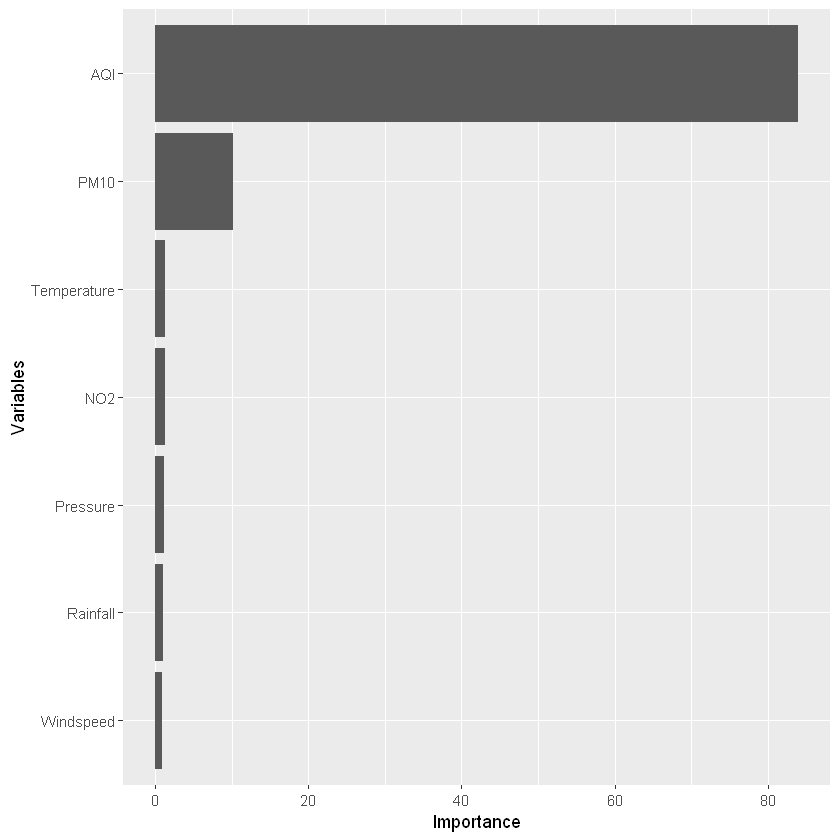

In [28]:
f

In [11]:

trainset <- cbind(heart[, 1:13],class.ind(heart$target) )
espnnet2=neuralnet(`0` + `1` ~ ., data=trainset,
                   hidden = c(10, 5),
                   linear.output = F,
                   lifesign = "full",
                   rep = 1)
plot(espnnet2)

ERROR: Error in class.ind(heart$target): could not find function "class.ind"


In [10]:
heart <- read_csv("heart.csv")

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


In [19]:
y_pred

[1]  75.8800814  31.4233201  46.1337215  40.3046866  47.5162766  66.4088230
   [7]  71.0883653  51.7962348  41.0040532  20.8893386  33.1278210  70.4328951
  [13]  50.5723752  39.4461637  57.8419357  68.8270644  71.0543372  97.2265885
  [19]  68.7987137  61.2511221  74.7871695  66.9153779  59.5870179  59.7745603
  [25]  69.1826325  67.2744756  69.3588358  68.9497943  64.3510523  59.6177014
  [31]  63.0339498 113.4301219  66.5542813  55.4387571  58.9142025  60.5324223
  [37]  57.1160393  69.4454660 112.4512950  66.8807706  53.0444149  57.5350810
  [43]  56.6352921  57.6560228  98.2285242  60.2275897  67.0644831  71.0487414
  [49]  63.5075802  60.9163741  59.6467048  59.4549540  61.3291710  57.4770930
  [55]  57.7713564  54.5539206  53.3481680  59.7876955  61.2201504  52.2528189
  [61]  43.8612746  39.8926659  97.9601188  82.2452669  96.9672543  90.1644487
  [67]  86.1299574 115.2495700 103.9902685  80.5509940  80.9713813  61.1361667
  [73] 113.8794158 109.9146742  97.4397641  24.8918534  47.6501439  57.6094435
  [79]  59.7859992  63.8197240 114.4294069  32.5826942  54.3275055  40.6106274
  [85]  45.6472749  44.7803605  57.8152896  63.9426509  57.2454258  52.0680512
  [91]  67.5788218  67.2653255  63.5844349  71.3009043 110.6444720 105.8012726
  [97]  63.6388047  57.5909986  63.6710135  64.0196251  63.1850750  63.0685583
 [103]  60.8802313  61.2478828 104.1942790  91.9787888  69.3705267  67.5910159
 [109]  66.9170124  66.9670030  71.2889045 101.6160238  81.9241837  59.9218410
 [115]  56.8245334  43.9245381  35.6295397  34.2059807  34.4587823 113.4716489
 [121] 110.9507188  86.6978945  53.1348312  53.3770504  67.6391296  63.7265204
 [127]  60.7814378  88.5352581  57.4315137  46.4428301  49.0665440  48.7551547
 [133]  48.6674419  57.6299467  63.6929382  57.6717745  57.5629998  57.6862938
 [139]  57.8925487  86.2382871  90.0205004  72.2349733  81.5146288  78.0745506
 [145]  68.6467778  60.3671192  55.2588693  63.4051638  69.2884468  72.0774017
 [151] 113.6945272 110.1434832 110.9054760  87.7906838  53.7044363  51.1654914
 [157]  48.4673488  45.6119653  42.5972846  42.8027355  73.8497408  45.7271366
 [163]  42.0309340  48.0465194  45.5551649  46.6982560  45.3502480  45.9359829
 [169]  61.3166732  96.5575921 113.6593176 112.8327411  64.0965359  61.3119452
 [175]  57.7176885  55.7515613  56.5652398  51.1615951 107.6751572 107.4503607
 [181]  61.4817151  65.2862643  72.0726347  74.3460190  78.3329969  63.2427935
 [187]  65.3724540  64.9981447  65.1106567  66.6867641 105.5341752 113.1346455
 [193]  82.3270281  65.3107666  65.8612219  70.8923364  72.5346546  71.8804444
 [199] 104.9195973  92.7575580  57.1199465  48.5456852  50.1685724  57.8374984
 [205]  67.1505633  67.4188787  74.6964897  91.5744809  81.1956892  65.0974442
 [211]  76.7892642  63.7391982  69.4281875  59.4622312 113.5245636  50.1409327
 [217]  57.7680893  59.1622662  65.0201635  51.5369895  67.6107446 107.9491264
 [223]  65.5616758  51.9440400  57.6887271  77.7404465  78.0373698  73.7248603
 [229]  75.7504267  42.7366188  37.9862312  38.8006691  52.0853350  86.7606437
 [235] 103.8752019 107.2140504 109.8927333  95.1892050  35.0549174  39.6637664
 [241]  59.8267851  91.4037134 111.9737776  45.5478277  35.8037634  31.1532983
 [247]  30.2774444  32.0716749  32.3204225  30.9396344  30.0981576  25.8128151
 [253]  27.2949648  34.8280651  34.3214780  31.1134194  31.4164541  35.9084510
 [259]  36.4762728  38.5660064  46.8939390 111.6346508  90.7083486  34.7689120
 [265]  23.0162057  24.3061571  33.9758772  32.6679725  41.2626733  30.5687286
 [271]  25.6181397  26.3320317  22.2175210  15.3329880  20.5819509  39.9155112
 [277]  38.2155677  38.5201182  23.4748583  20.6822607  25.2905246  14.9117736
 [283]  15.1113978  32.8718262  32.0468991  40.1476738  47.7852004  49.0926180
 [289]  57.3590258  57.6715787  59.3264956  64.0300685  59.0253191  57.5603457
 [295]  59.7202617  57.3991242  56.8423990  48.7557272  43.0174986  31.8836590
 [301]  33.6360574  38.7628013  40.3335390  49.135026

In [6]:
install.packages("nnet")

Installing package into 'C:/Users/optra/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\optra\AppData\Local\Temp\Rtmp4uijj2\downloaded_packages
